In [2]:
# All the important Import statements

from Bio import AlignIO
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
from Bio.SeqRecord import SeqRecord
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from tqdm import tqdm


In [137]:
def getEntropy(x):
    return x * np.log(x)



class Prot_Seq_Entropy:
    
    AA_resid = ['A', 'R', 'N', 'D', 'B', 'C', 
                'E', 'Q', 'Z', 'G', 'H', 'I', 
                'L', 'K', 'M', 'F', 'P', 'T', 
                'W', 'Y', 'V']
    AA_zeros = [0] * len(AA_resid)
    ME_headers = AA_resid
    MI_headers = ["{}{}" for aa, b_ in zip(AA_resid, ['A', 'B', 'AB'])]
    
    def __init__(self, seq_list, A_len):
        self.seq_list = seq_list
        self.A_len = A_len
        self.df_marginal_entropy_count = pd.DataFrame(0, index=np.arange(0, 2*A_len), columns=self.ME_headers)
        self.df_marginal_entropy_prob  = pd.DataFrame(0.0, index=np.arange(0, 2*A_len), columns=self.ME_headers)
        self.df_mutual_information_count = pd.DataFrame(0, index=np.arange(0, 2*A_len), columns=self.MI_headers)
        self.df_mutual_information_prob  = pd.DataFrame(0.0, index=np.arange(0, 2*A_len), columns=self.MI_headers)
        self.df_marginal_entropy_count.index.rename('resnum', inplace=True)
        self.df_marginal_entropy_prob.index.rename('resnum', inplace=True)
        self.df_mutual_information_count.index.rename('resnum', inplace=True)
        self.df_mutual_information_prob.index.rename('resnum', inplace=True)
        
        
    def compute_p_resnum(self, resnum):
        # self.df_marginal_entropy_count.loc[resnum] = pd.DataFrame([self.AA_zeros], columns=self.ME_headers)
        for myseq in self.seq_list:
            self.df_marginal_entropy_count.loc[resnum, myseq[resnum]] = self.df_marginal_entropy_count.loc[resnum, myseq[resnum]] + 1
        self.df_marginal_entropy_prob.loc[resnum] = (self.df_marginal_entropy_count.loc[resnum] 
                                                     * (1 / len(self.seq_list)))
        print(self.df_marginal_entropy_count)
    
    
    def add_seq(self, new_seq):
        self.seq_list.extend(add_seq)
    
    
    def entropy_of_resnum(self, resnum):
        self.compute_p_resnum(resnum)
        return self.df_marginal_entropy_prob.loc[resnum].apply(getEntropy)
    
        
    #def mutual_information_respair(self, resnum1, resnum2):
        #self.entropy_r1 = self.entropy_of_resnum(resnum1)
        #self.entropy_r2 = self.entropy_of_resnum(resnum2)
        
        
    

In [138]:
#-------------test with toy sequence
list_AA = ['G','A','V','L','I','N','C','Q','H','M','F','P','S','T','W','Y','R','K','E','D','X']

seq1 = list(Seq("GGGGGLLLLL",IUPAC.protein))
seq2 = list(Seq("LLGLLGGGGG",IUPAC.protein))
seq3 = list(Seq("GGGGGLLLLL",IUPAC.protein))
seq4 = list(Seq("GGGGGLLLLL",IUPAC.protein))
seq_lst = [seq1, seq2, seq3, seq4]

N_t = 2

myProtSeq = Prot_Seq_Entropy(seq_lst, 5)
myProtSeq.entropy_of_resnum(4)

        A  R  N  D  B  C  E  Q  Z  G ...  I  L  K  M  F  P  T  W  Y  V
resnum                               ...                              
0       0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
1       0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
2       0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
3       0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
4       0  0  0  0  0  0  0  0  0  3 ...  0  1  0  0  0  0  0  0  0  0
5       0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
6       0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
7       0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
8       0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0
9       0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0

[10 rows x 21 columns]


A         NaN
R         NaN
N         NaN
D         NaN
B         NaN
C         NaN
E         NaN
Q         NaN
Z         NaN
G   -0.215762
H         NaN
I         NaN
L   -0.346574
K         NaN
M         NaN
F         NaN
P         NaN
T         NaN
W         NaN
Y         NaN
V         NaN
Name: 4, dtype: float64

[[0. 0. 1. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 1. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 1. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 1. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 1. 0. 0. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 0. 1. 1. 0. 0. 0. 0. 0.]]


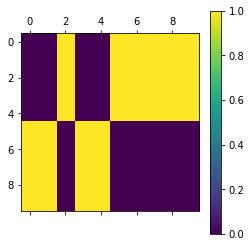

In [5]:

#-----------initialize empty probability list for each AA    
p_AA = np.zeros((len(seq1)))    
    

#columns = ['i','j','p_A','p_B','p_AB']
#index = range(0,len(seq1))

#df = pd.DataFrame(index=index,columns=columns)

#for i in range(len(seq1)):
#    for j in range(len(seq2)):
#        if seq1[i] == seq2[i]:      
         
p1 = np.zeros((len(seq1)))
p2 = np.zeros((len(seq2)))
#s1 = np.zeros((len(seq1),len(seq2)))

#def entropy(i,j):
#    probs = []
#    for i,c1 in enumerate(seq1):
#        for j,c2 in enumerate(seq2):
                       
            #probs.append(np.mean(np.logical_and(X == c1, Y == c2)))

#    return np.sum(-p * np.log2(p) for p in probs)
    

cs = np.zeros((len(seq1),len(seq2)))

for i,z1 in enumerate(seq1):
    for j,z2 in enumerate(seq2):
        if z1 == z2:
            #if i == j:
                cs[i,j] += 1
                #print(i,j,z1,z2)
print(cs)
        #else:
        #        cs[i,j] = 0
            
plt.matshow(cs)
plt.colorbar()



In [6]:
#------------------------------------

# seq_record1 = list(SeqIO.parse("1.aln", "clustal"))
# seq_record2 = list(SeqIO.parse("2.aln", "clustal"))
# seq_record3 = list(SeqIO.parse("3.aln", "clustal"))

msa_lst1 = []
msa_lst2 = []
msa_lst3 = []

for i in seq_record1:
    msa_lst1.append(i.seq)

for i in seq_record2:
    msa_lst2.append(i.seq)

for i in seq_record3:
    msa_lst3.append(i.seq)
    
msa_lst1 = [str(s).replace('-','X') for s in msa_lst1]
msa_lst2 = [str(s).replace('-','X') for s in msa_lst2]
msa_lst3 = [str(s).replace('-','X') for s in msa_lst3]

n_A = 169 #---number of residues in each aligned Dpr
n_B = 108 #---number of residues in each aligned DIP
n_tot = 277 #---number of residues in each aligned Dpr-DIP complex

print((msa_lst3[0][:n_A]))
print(len(msa_lst3[0][:n_A]))
print((msa_lst3[0][n_A+1:n_tot]))
print(len(msa_lst3[0][n_A:]))
print(msa_lst3[0])
print(len(msa_lst3[0]))


#print(len(msa_lst3[0]))
#print(len(msa_lst1[0]))
#print(len(msa_lst2[8]))

count = np.zeros((len(msa_lst1[0]),len(msa_lst2[0])))

#for l1 in msa_lst1: # 21
#    for l2 in msa_lst2: # 9
for i,s1 in enumerate(msa_lst1[0]):
    for j,s2 in enumerate(msa_lst2[0]):
        
        if s1 == s2:
            #if i == j:
                count[i,j] += 1
                #print(i,j,s1,s2)
        #else:
        #       count[i,j] = 0
                
#print(count)

plt.matshow(count)
plt.colorbar()



NameError: name 'seq_record1' is not defined